Using Virtual Environment
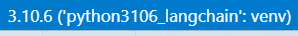

Collapsable Jupyter Notebook Cells

In [ ]:
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user

Mermaid Diagram

```mermaid
graph TD;
    A-->B;
    A-->C;
    B-->D;
    C-->D;
```

Print All Langchain Tools

In [1]:
import pprint
from langchain.agents import get_all_tool_names

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(get_all_tool_names())

[   'requests',
    'requests_get',
    'requests_post',
    'requests_patch',
    'requests_put',
    'requests_delete',
    'terminal',
    'sleep',
    'wolfram-alpha',
    'google-search',
    'google-search-results-json',
    'searx-search-results-json',
    'bing-search',
    'metaphor-search',
    'ddg-search',
    'google-lens',
    'google-serper',
    'google-scholar',
    'google-finance',
    'google-trends',
    'google-jobs',
    'google-serper-results-json',
    'searchapi',
    'searchapi-results-json',
    'serpapi',
    'dalle-image-generator',
    'twilio',
    'searx-search',
    'merriam-webster',
    'wikipedia',
    'arxiv',
    'golden-query',
    'pubmed',
    'human',
    'awslambda',
    'stackexchange',
    'sceneXplain',
    'graphql',
    'openweathermap-api',
    'dataforseo-api-search',
    'dataforseo-api-search-json',
    'eleven_labs_text2speech',
    'google_cloud_texttospeech',
    'reddit_search',
    'news-api',
    'tmdb-api',
    'podcast-api',


Tools Demo

In [ ]:
import pprint
from langchain.agents import get_all_tool_names
from langchain.agents import load_tools, initialize_agent
from langchain.agents import AgentType
from langchain_openai import OpenAI

llm = OpenAI(temperature=0)
prompt = "When was the 4rd president of the united states born? What is that year raised to the power of 3?"

tools = load_tools(["wikipedia", "llm-math"], llm=llm)
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

agent.run(prompt)

Human Input to Agent

In [ ]:
from langchain_openai import OpenAI
from langchain.agents import load_tools, initialize_agent
from langchain.agents import AgentType

llm = OpenAI(temperature=0)
tools = load_tools(["human"]) #The param "human" specify that human manual input is required.

agent_chain = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

agent_chain.invoke({"input":"What's my friend Andi's surname"})

Human Input New Way

In [ ]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAI
from langchain.agents import load_tools, create_json_chat_agent
from langchain.agents import AgentExecutor
from langchain import hub

load_dotenv()
print("Key:" + os.environ["OPENAI_API_KEY"])

llm = ChatOpenAI(temperature=0.0)
math_llm = OpenAI(temperature=0.0)
tools = load_tools(
    ["human", "llm-math"],
    llm=math_llm,
)
prompt = hub.pull("hwchase17/react-chat-json")

agent = create_json_chat_agent(llm, tools, prompt)

agent_executor = AgentExecutor(agent=agent, tools=tools, handle_parsing_errors=True)

agent_executor.invoke({"input": "hi"})

# Using with chat history
from langchain_core.messages import AIMessage, HumanMessage
agent_executor.invoke(
    {
        "input": "what's my name?",
        "chat_history": [
            HumanMessage(content="hi! my name is bob"),
            AIMessage(content="Hello Bob! How can I assist you today?"),
            ],
    }
)